In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


# Read in Train and Test Data sets

In [2]:
df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")
df_test = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Check for null values

In [4]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
df_test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

Key words have %20 instead of spaces so fill those

In [6]:
df['keyword'].unique()[:25]

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard'],
      dtype=object)

**Fix Training set by filling na values with '' and %20 with ' '.**

In [7]:
df['location']=df['location'].fillna('')
df['keyword']=df['keyword'].fillna('')
df = df.replace('%20', ' ', regex=True)

In [8]:
df_test['location'] = df_test['location'].fillna('')
df_test['keyword'] = df_test['keyword'].fillna('')
df_test = df_test.replace('%20', ' ', regex=True)

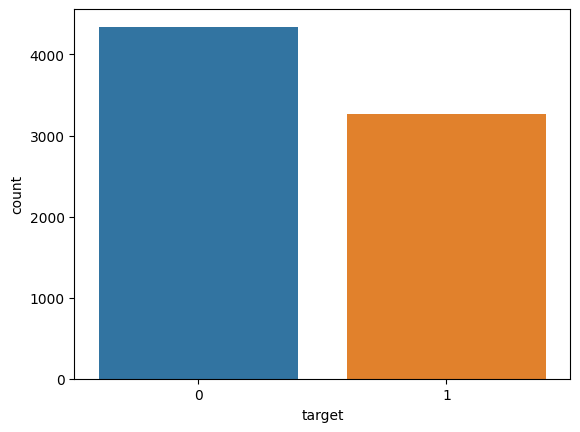

In [9]:
sns.countplot(data=df, x='target');

In [10]:
df[800:1400]

,id,keyword,location,text,target
800,1160,blight,Laventillemoorings,If you dotish to blight your car go right ahea...,0
801,1162,blight,UK,Sexual Revolution:Blight For Women is out! htt...,0
802,1164,blight,Scotland,LIKE I SWEAR THE SECRET WE'LL UNCOVER IS THE O...,0
803,1166,blight,London,@WillHillBet what is double result live on the...,0
804,1167,blight,"Vancouver, BC",@parksboardfacts first off it is the #ZippoLin...,0
...,...,...,...,...,...
1395,2014,casualties,Philippines,Civilian casualties rise as Afghan war intensi...,1
1396,2015,casualties,,Afghan conflict sees 'sharp rise' in female ca...,1
1397,2016,casualties,"Bronx, New York",Warfighting Robots Could Reduce Civilian Casua...,1
1398,2017,casualties,Canadian bread,@LibertarianLuke I'm all for that to be honest...,0


## Plot to show some of the positive/negative ratios for given keywords
Some of the keywords are pretty strongly correlated

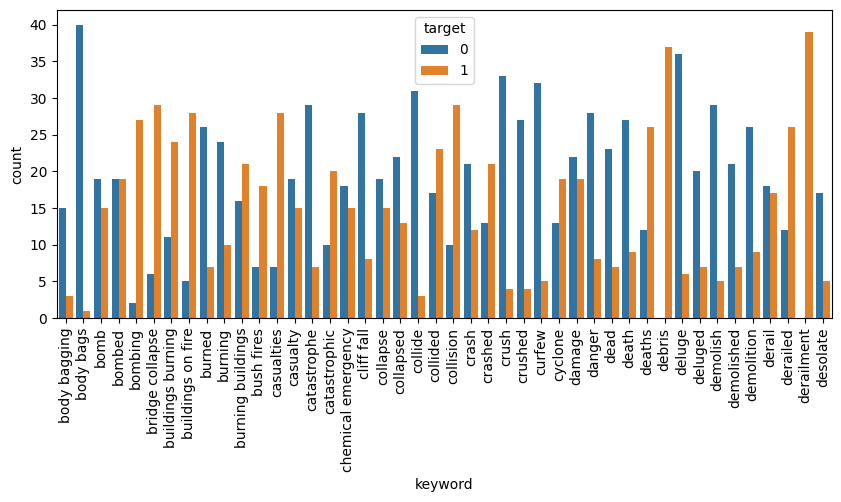

In [11]:
plt.figure(figsize=(10,4))
sns.countplot(data=df[1000:2500], x='keyword',hue='target')
plt.xticks(rotation=90);

# Split Train Data to do inital testing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df['text combo'] = (df['keyword']+" ")*3+df['location']+" "+df['text']
df_test['text combo'] = (df_test['keyword']+" ")*3+df_test['location']+" "+df_test['text']

df[800:804]

,id,keyword,location,text,target,text combo
800,1160,blight,Laventillemoorings,If you dotish to blight your car go right ahea...,0,blight blight blight Laventillemoorings If yo...
801,1162,blight,UK,Sexual Revolution:Blight For Women is out! htt...,0,blight blight blight UK Sexual Revolution:Blig...
802,1164,blight,Scotland,LIKE I SWEAR THE SECRET WE'LL UNCOVER IS THE O...,0,blight blight blight Scotland LIKE I SWEAR THE...
803,1166,blight,London,@WillHillBet what is double result live on the...,0,blight blight blight London @WillHillBet what ...


In [14]:
#X = df.drop(['target','id'], axis=1)
X = df.drop('target',axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=814)
ids_train = X_train['id']
X_train = X_train['text combo']
ids_test = X_test['id']
X_test = X_test['text combo']

In [15]:
df_test

,id,keyword,location,text,text combo
0,0,,,Just happened a terrible car crash,Just happened a terrible car crash
1,2,,,"Heard about #earthquake is different cities, s...",Heard about #earthquake is different citie...
2,3,,,"there is a forest fire at spot pond, geese are...","there is a forest fire at spot pond, geese..."
3,9,,,Apocalypse lighting. #Spokane #wildfires,Apocalypse lighting. #Spokane #wildfires
4,11,,,Typhoon Soudelor kills 28 in China and Taiwan,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...,...
3258,10861,,,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY F...
3259,10865,,,Storm in RI worse than last hurricane. My city...,Storm in RI worse than last hurricane. My ...
3260,10868,,,Green Line derailment in Chicago http://t.co/U...,Green Line derailment in Chicago http://t....
3261,10874,,,MEG issues Hazardous Weather Outlook (HWO) htt...,MEG issues Hazardous Weather Outlook (HWO)...


# Setup various models to test

In [16]:
#from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import classification_report,f1_score,confusion_matrix,ConfusionMatrixDisplay

### Vectorize the text data

In [17]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [18]:
X_train_tfidf

<6851x21557 sparse matrix of type '<class 'numpy.float64'>'
	with 75722 stored elements in Compressed Sparse Row format>

###  MultinomialNB model

In [19]:
mnb = MultinomialNB()
param_grid = {'alpha':[1,2,5,10]}
mnb_grid = GridSearchCV(estimator=mnb, param_grid=param_grid, scoring='f1')
mnb_start = time.time()
mnb_grid.fit(X_train_tfidf, y_train)
mnb_end = time.time()
print(f'Time to fit = {mnb_end - mnb_start:.3f}s')
mnb_grid.best_params_

Time to fit = 0.175s


{'alpha': 1}

0.7407407407407407
              precision    recall  f1-score   support

           0       0.79      0.89      0.83       436
           1       0.82      0.67      0.74       326

    accuracy                           0.80       762
   macro avg       0.80      0.78      0.79       762
weighted avg       0.80      0.80      0.79       762



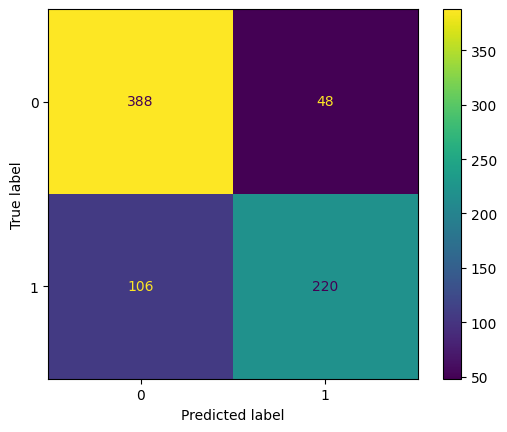

In [20]:
mnb_preds = mnb_grid.predict(X_test_tfidf)
print(f1_score(y_test,mnb_preds))
print(classification_report(y_test,mnb_preds))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, mnb_preds)).plot();

###  LogisticRegression model

In [21]:
log = LogisticRegression(max_iter=1000,)
param_grid = {'C':[3,4,5,6,7,8]}
log_grid = GridSearchCV(estimator=log, param_grid=param_grid, scoring='f1')
log_start = time.time()
log_grid.fit(X_train_tfidf, y_train)
log_end = time.time()
print(f'Time to fit = {log_end - log_start:.3f}s')
log_grid.best_params_

Time to fit = 22.525s


{'C': 6}

0.7707006369426751
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       436
           1       0.80      0.74      0.77       326

    accuracy                           0.81       762
   macro avg       0.81      0.80      0.80       762
weighted avg       0.81      0.81      0.81       762



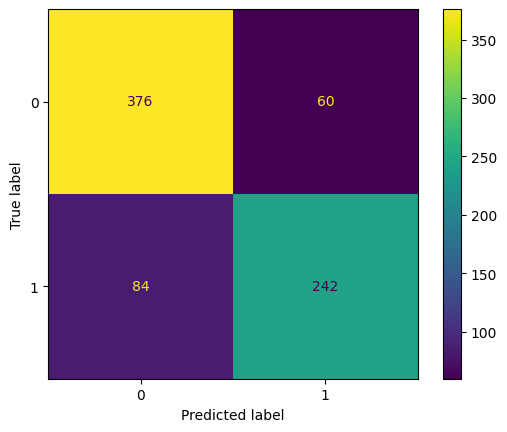

In [22]:
log_preds = log_grid.predict(X_test_tfidf)
print(f1_score(y_test,log_preds))
print(classification_report(y_test,log_preds))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, log_preds)).plot();

### SGDClassifier model

In [23]:
sgdc = SGDClassifier()
#param_grid = {'C':[3,4,5,6,7,8]}
#log_grid = GridSearchCV(estimator=log, param_grid=param_grid, scoring='f1')
sgdc_start = time.time()
sgdc.fit(X_train_tfidf, y_train)
sgdc_end = time.time()
print(f'Time to fit = {sgdc_end - sgdc_start:.3f}s')
sgdc.coef_

Time to fit = 0.046s


array([[-0.15455976, -0.42743686,  0.3471347 , ...,  0.43783586,
        -0.16811547,  0.20548164]])

0.7783094098883572
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       436
           1       0.81      0.75      0.78       326

    accuracy                           0.82       762
   macro avg       0.82      0.81      0.81       762
weighted avg       0.82      0.82      0.82       762



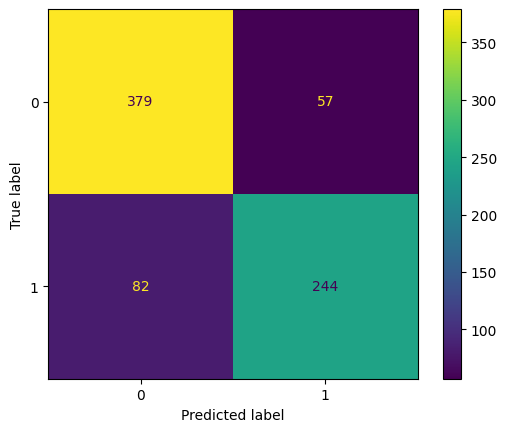

In [24]:
sgdc_preds = sgdc.predict(X_test_tfidf)
print(f1_score(y_test,sgdc_preds))
print(classification_report(y_test,sgdc_preds))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, sgdc_preds)).plot();

### LinearSVC model

In [25]:
lin_svc = LinearSVC()
param_grid = {'C':[1,2,5,10]}
lin_svc_grid = GridSearchCV(estimator=lin_svc, param_grid=param_grid, scoring='f1')
lin_svc_start = time.time()
lin_svc_grid.fit(X_train_tfidf, y_train)
lin_svc_end = time.time()
print(f'Time to fit = {lin_svc_end - lin_svc_start:.3f}s')
lin_svc_grid.best_params_

Time to fit = 1.828s


{'C': 1}

0.7682539682539682
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       436
           1       0.80      0.74      0.77       326

    accuracy                           0.81       762
   macro avg       0.81      0.80      0.80       762
weighted avg       0.81      0.81      0.81       762



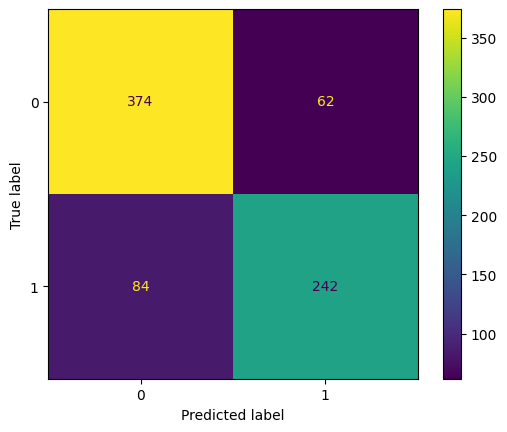

In [26]:
lin_svc_preds = lin_svc_grid.predict(X_test_tfidf)
print(f1_score(y_test,lin_svc_preds))
print(classification_report(y_test,lin_svc_preds))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, lin_svc_preds)).plot();

### SVC model
<span style="font-size:16px;color:red;"> Below cell is the slowest cell by far (takes ~4 minutes with the grid search) </span>

In [27]:
# svc = SVC()
# param_grid = {'C': [1,10,100], 
#               'gamma': [1,0.1,0.01]}
# svc_grid = GridSearchCV(estimator=svc, param_grid=param_grid, scoring='f1')
# svc_start = time.time()
# svc_grid.fit(X_train_tfidf, y_train)
# svc_end = time.time()
# print(f'Time to fit = {svc_end - svc_start:.3f}s')
# svc_grid.best_params_

In [28]:
# svc_preds = svc_grid.predict(X_test_tfidf)
# print(f1_score(y_test,svc_preds))
# print(classification_report(y_test,svc_preds))
# ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, svc_preds)).plot();

# Compare Models

In [29]:
print(f'MNB time to fit = {mnb_end - mnb_start:.3f}s')
print(f'MNB f1 score = {f1_score(y_test,mnb_preds):.4f}')
print('-'*10)
print(f'LogReg time to fit = {log_end - log_start:.3f}s')
print(f'LogReg f1 score = {f1_score(y_test,log_preds):.4f}')
print('-'*10)
print(f'SGDClass time to fit = {sgdc_end - sgdc_start:.3f}s')
print(f'SGDClass f1 score = {f1_score(y_test,sgdc_preds):.4f}')
print('-'*10)
print(f'LinSVC time to fit = {lin_svc_end - lin_svc_start:.3f}s')
print(f'LinSVC f1 score = {f1_score(y_test,lin_svc_preds):.4f}')
# print('-'*10)
# print(f'SVC time to fit = {svc_end - svc_start:.3f}s')
# print(f'SVC f1 score = {f1_score(y_test,svc_preds):.4f}')

MNB time to fit = 0.175s
MNB f1 score = 0.7407
----------
LogReg time to fit = 22.525s
LogReg f1 score = 0.7707
----------
SGDClass time to fit = 0.046s
SGDClass f1 score = 0.7783
----------
LinSVC time to fit = 1.828s
LinSVC f1 score = 0.7683


# Final Data Set prep

In [30]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X['text combo'])
X_final_train_tfidf = tfidf.transform(X['text combo'])
X_final_test_tfidf = tfidf.transform(df_test['text combo'])
ids_out = df_test['id']

## Final dataset

In [31]:
X_final_train_tfidf

<7613x23181 sparse matrix of type '<class 'numpy.float64'>'
	with 84162 stored elements in Compressed Sparse Row format>

In [32]:
# model = SVC(**svc_grid.best_params_)
model = LogisticRegression(max_iter=1000, **log_grid.best_params_)
# model = SGDClassifier()
final_start = time.time()
model.fit(X_final_train_tfidf, y)
final_end = time.time()
print(f'Time to fit = {final_end - final_start:.3f}s')

Time to fit = 1.020s


In [33]:
final_preds = model.predict(X_final_test_tfidf)

# Final output formatting

In [34]:
output_df = pd.DataFrame({'id': ids_out,
                          'target': final_preds.squeeze()})

In [35]:
output_df

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


In [36]:
output_df.to_csv('/kaggle/working/submission.csv', index=False)